# A Critical Investigation to the Resilience of the London's Underground as a Network

*Student Number:23138651*

## Part 1: London's underground resilience
### I. Topological Network
#### I.1 Centrality Measure

##### Degree Centrality

In [1]:
# First import the package necessary
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from operator import itemgetter

In [2]:
#OK, let us start with the graphml file for London's underground

G = nx.read_graphml('london_network.graphml')
# To check node attributes:
list(G.nodes(data = True))[0]


('Wembley Park', {'coords': '(519316.5590174915, 186389.32981656672)'})

In [3]:
#since coords tuples are stored as string, need to convert them back to tuples using eval()
for node in G.nodes():
    G.nodes[node]['coords'] = eval(G.nodes[node]['coords'])

In [4]:
# To check node attributes again:
list(G.nodes(data = True))[0]

('Wembley Park', {'coords': (519316.5590174915, 186389.32981656672)})

In [5]:
# To check edges attributes:
list(G.edges(data = True))[0]

('Wembley Park',
 'Kingsbury',
 {'length': 2916.7715580506483, 'line_name': 'Jubilee', 'flows': 12356})

In [6]:
node_labels = {node: node for node in G.nodes()} 
node_labels

{'Wembley Park': 'Wembley Park',
 'Kingsbury': 'Kingsbury',
 'Queensbury': 'Queensbury',
 'Canons Park': 'Canons Park',
 'Stanmore': 'Stanmore',
 'Stratford': 'Stratford',
 'West Ham': 'West Ham',
 'Canning Town': 'Canning Town',
 'North Greenwich': 'North Greenwich',
 'Canary Wharf': 'Canary Wharf',
 'Canada Water': 'Canada Water',
 'Bermondsey': 'Bermondsey',
 'London Bridge': 'London Bridge',
 'Southwark': 'Southwark',
 'Waterloo': 'Waterloo',
 'Westminster': 'Westminster',
 'Green Park': 'Green Park',
 'Bond Street': 'Bond Street',
 'Baker Street': 'Baker Street',
 "St. John's Wood": "St. John's Wood",
 'Swiss Cottage': 'Swiss Cottage',
 'Finchley Road': 'Finchley Road',
 'Neasden': 'Neasden',
 'Dollis Hill': 'Dollis Hill',
 'Willesden Green': 'Willesden Green',
 'Kilburn': 'Kilburn',
 'West Hampstead': 'West Hampstead',
 'West Acton': 'West Acton',
 'Ealing Broadway': 'Ealing Broadway',
 'North Acton': 'North Acton',
 'West Ruislip': 'West Ruislip',
 'Ruislip Gardens': 'Ruislip Ga

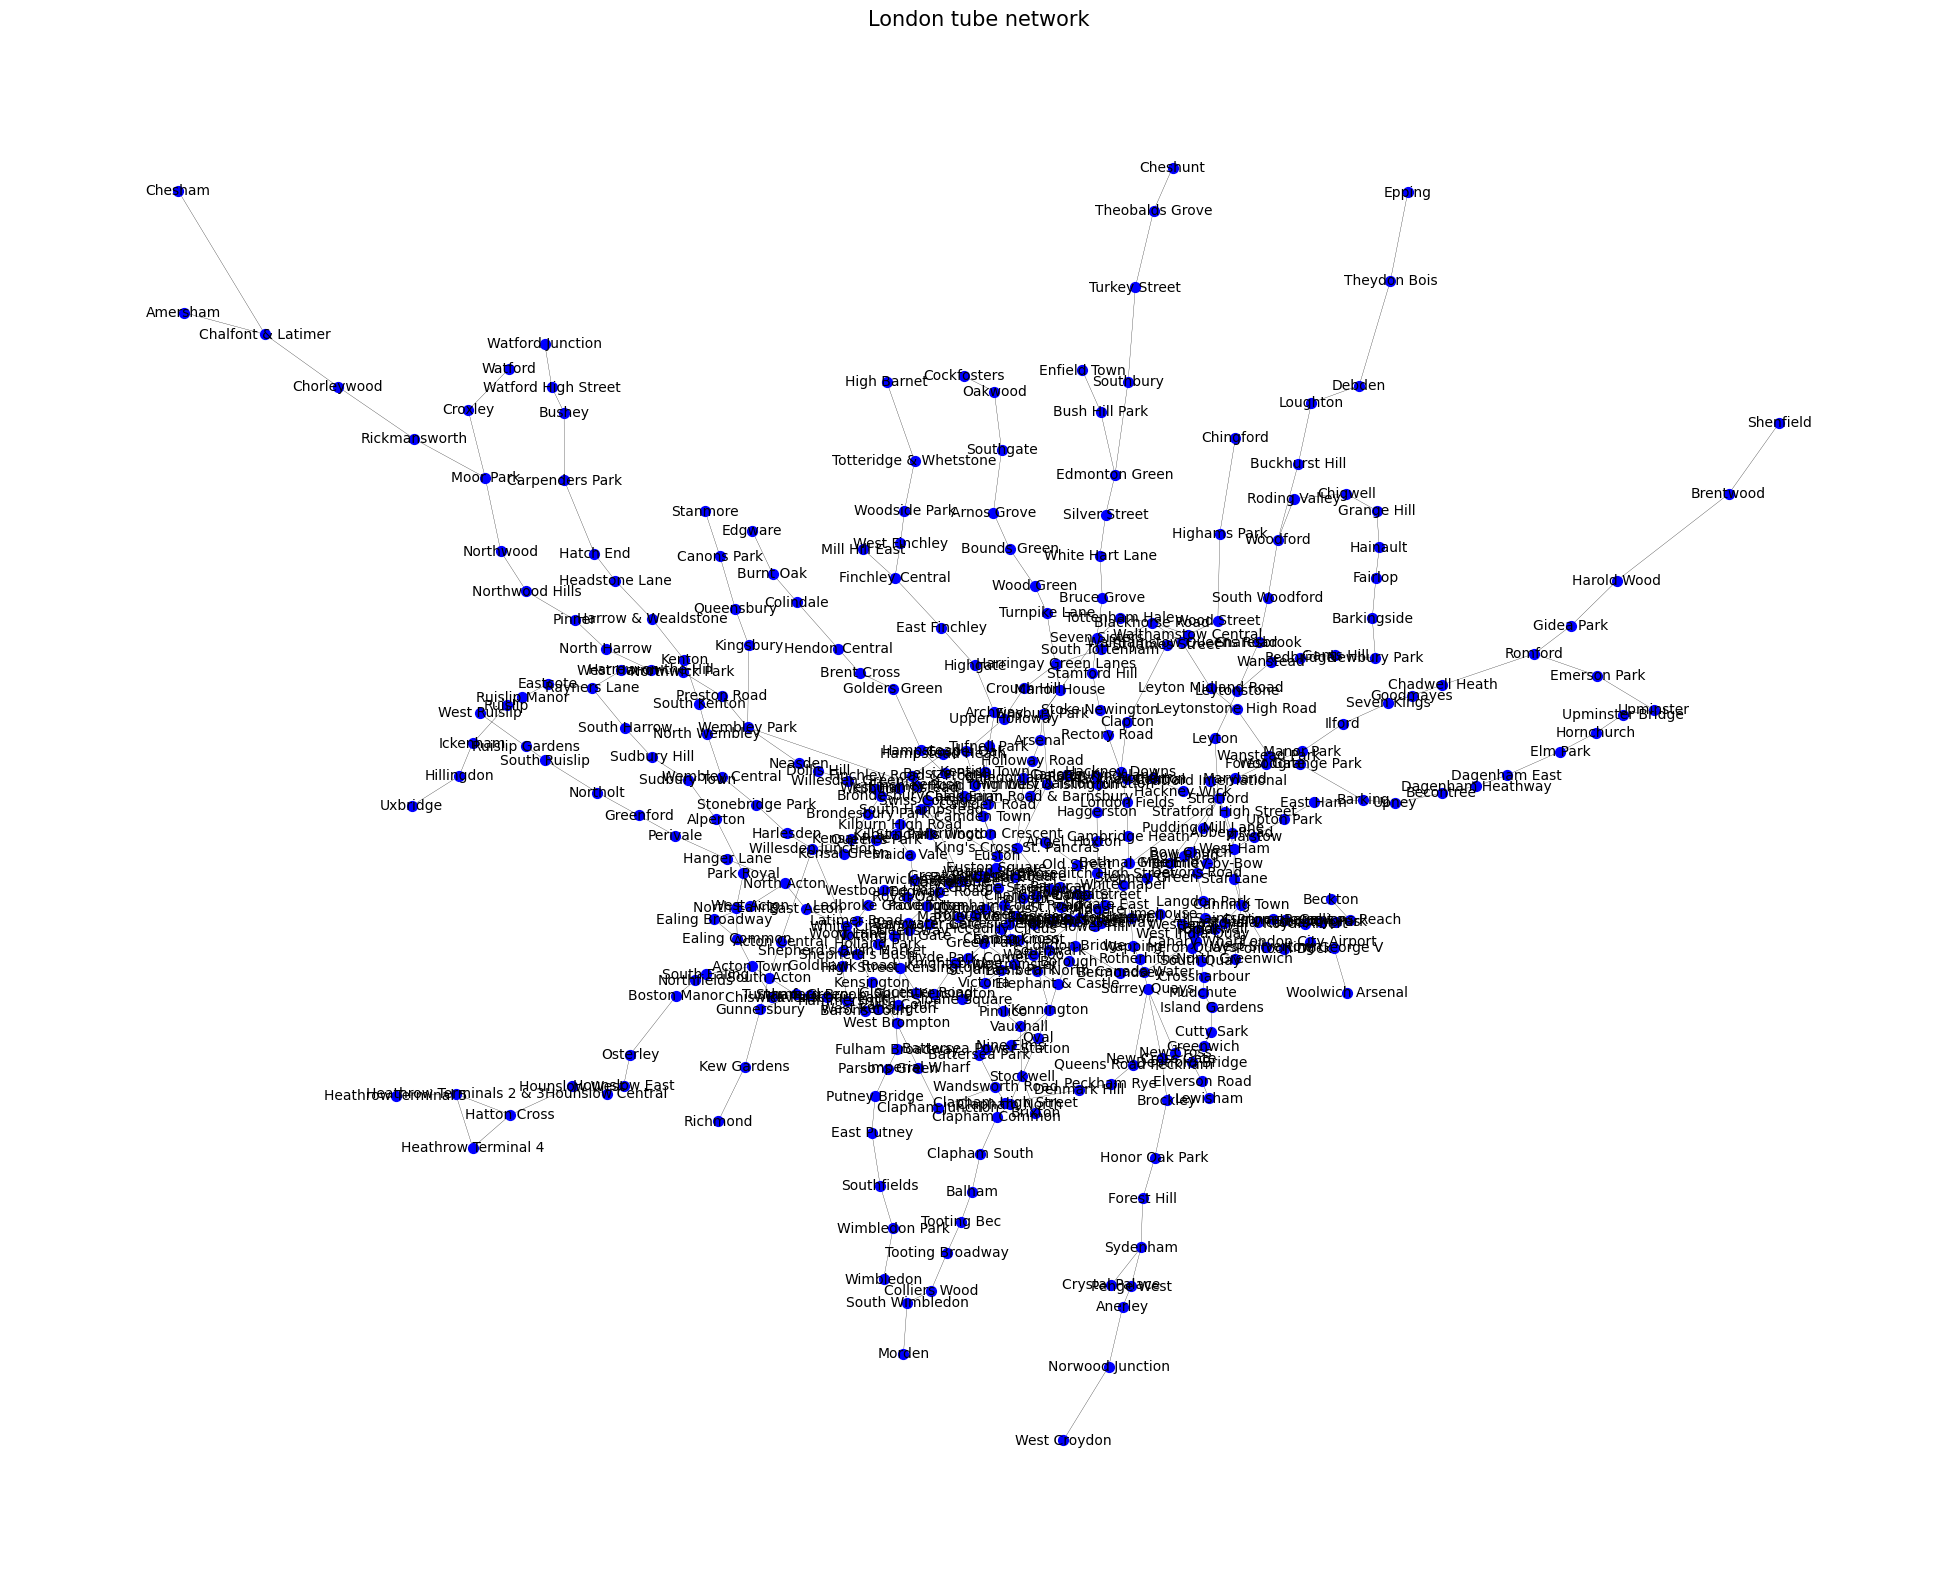

In [7]:
plt.subplots(figsize=(25,20))
node_labels = {node: node for node in G.nodes()} 
pos = nx.get_node_attributes(G, 'coords')
nx.draw_networkx_nodes(G, pos, node_size=50, node_color='b')
nx.draw_networkx_edges(G, pos, arrows=False, width=0.2)
nx.draw_networkx_labels(G, pos, node_labels, font_size=10, font_color='black')
plt.title("London tube network", fontsize=15)
plt.axis("off")
plt.show()

In [8]:
#We can print the dataframe from the shapefile to check the data
df = nx.to_pandas_edgelist(G)
df[0:10]

,source,target,line_name,flows,length
0,Wembley Park,Kingsbury,Jubilee,12356,2916.771558
1,Wembley Park,Neasden,Jubilee,6744,2353.165938
2,Wembley Park,Preston Road,Metropolitan,36601,1419.735166
3,Wembley Park,Finchley Road,Metropolitan,55216,7266.373927
4,Kingsbury,Queensbury,Jubilee,9419,1245.995234
5,Queensbury,Canons Park,Jubilee,6385,1693.307343
6,Canons Park,Stanmore,Jubilee,3624,1419.669476
7,Stratford,West Ham,Jubilee,91801,1673.509515
8,Stratford,Mile End,Central,12010,2805.001392
9,Stratford,Leyton,Central,56082,2131.342926


In [9]:
#  We can calculate the degree centrality using networkx function:
deg_london =nx.degree_centrality(G)
nx.set_node_attributes(G,dict(deg_london),'degree')

In [10]:
# top 10 degree centrality
df = pd.DataFrame()
df['station_name'] = pd.Series(list(G.nodes()))
degree_dict = pd.Series(nx.get_node_attributes(G, 'degree'))
df['degree'] = df['station_name'].map(degree_dict) 

df_sorted = df.sort_values(["degree"], ascending=False)
top10_degree = df_sorted[0:10]

In [11]:
top10_degree

,station_name,degree
5,Stratford,0.0225
50,Bank and Monument,0.0200
229,King's Cross St. Pancras,0.0175
18,Baker Street,0.0175
180,Earl's Court,0.0150
45,Oxford Circus,0.0150
51,Liverpool Street,0.0150
14,Waterloo,0.0150
16,Green Park,0.0150
7,Canning Town,0.0150


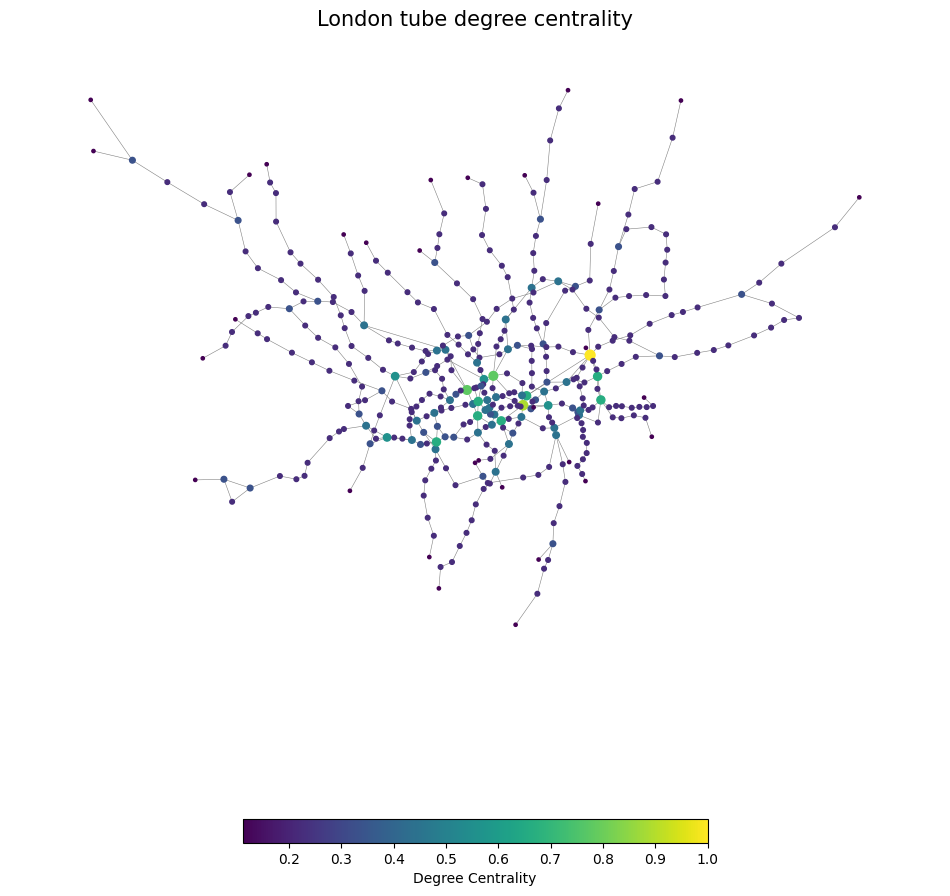

In [12]:
# Lets set colour and size of nodes according to betweenness values
degree_values=[(i[1]['degree']) for i in G.nodes(data=True)]

deg_color=[(i[1]['degree']/(max(degree_values))) for i in G.nodes(data=True)]
deg_size=[(i[1]['degree']/(max(degree_values)))*50 for i in G.nodes(data=True)]



# Plot graph

pos=pos

fig, ax = plt.subplots(figsize=(12,12))


nx.draw_networkx_edges(G, pos,edge_color='gray', 
        width=0.4)
nod=nx.draw_networkx_nodes(G,
        pos = pos,
        node_color= deg_color,
        node_size= deg_size)

plt.colorbar(nod,label="Degree Centrality",orientation="horizontal", shrink=0.5)
plt.axis("off")
plt.title("London tube degree centrality",fontsize=15)
plt.show()

#### Betweenness Centrality on nodes:

In [13]:
### Topological betweenness centrality:

#Let us compute the betweenness centrality for the network, without using weights:
bet_london_t=nx.betweenness_centrality(G)
# We can add these values to the nodes attributes:
nx.set_node_attributes(G,bet_london_t,'betweenness_t')


In [14]:
bet_london_t

{'Wembley Park': 0.1350979134343796,
 'Kingsbury': 0.014924812030075188,
 'Queensbury': 0.009974937343358397,
 'Canons Park': 0.005,
 'Stanmore': 0.0,
 'Stratford': 0.2978457823852558,
 'West Ham': 0.1393436246641132,
 'Canning Town': 0.0961666467756693,
 'North Greenwich': 0.0316602816565223,
 'Canary Wharf': 0.07328592856600373,
 'Canada Water': 0.10764763640703481,
 'Bermondsey': 0.07287635756056814,
 'London Bridge': 0.08134579142661848,
 'Southwark': 0.017284550662370193,
 'Waterloo': 0.2439208311181996,
 'Westminster': 0.2033352871717533,
 'Green Park': 0.21583486358392392,
 'Bond Street': 0.1415909931755799,
 'Baker Street': 0.19156776455930646,
 "St. John's Wood": 0.0018077336197636965,
 'Swiss Cottage': 0.00043441938178780294,
 'Finchley Road': 0.165084686825288,
 'Neasden': 0.00420217209690894,
 'Dollis Hill': 0.0004385964912280702,
 'Willesden Green': 0.0012113617376775271,
 'Kilburn': 0.005747702589807853,
 'West Hampstead': 0.056885538159974235,
 'West Acton': 0.0082669172

In [15]:
# To dataframe using the nodes as the index
df = pd.DataFrame()
df['station_name'] = pd.Series(list(G.nodes()))
betweenness_dict = pd.Series(nx.get_node_attributes(G, 'betweenness_t'))
df['betweenness_t'] = df['station_name'].map(betweenness_dict) 

df_sorted = df.sort_values(["betweenness_t"], ascending=False)
top10_betweenness_t = df_sorted[0:10]

In [16]:
top10_betweenness_t

,station_name,betweenness_t
5,Stratford,0.297846
50,Bank and Monument,0.290489
51,Liverpool Street,0.270807
229,King's Cross St. Pancras,0.255307
14,Waterloo,0.243921
16,Green Park,0.215835
150,Euston,0.208324
15,Westminster,0.203335
18,Baker Street,0.191568
21,Finchley Road,0.165085


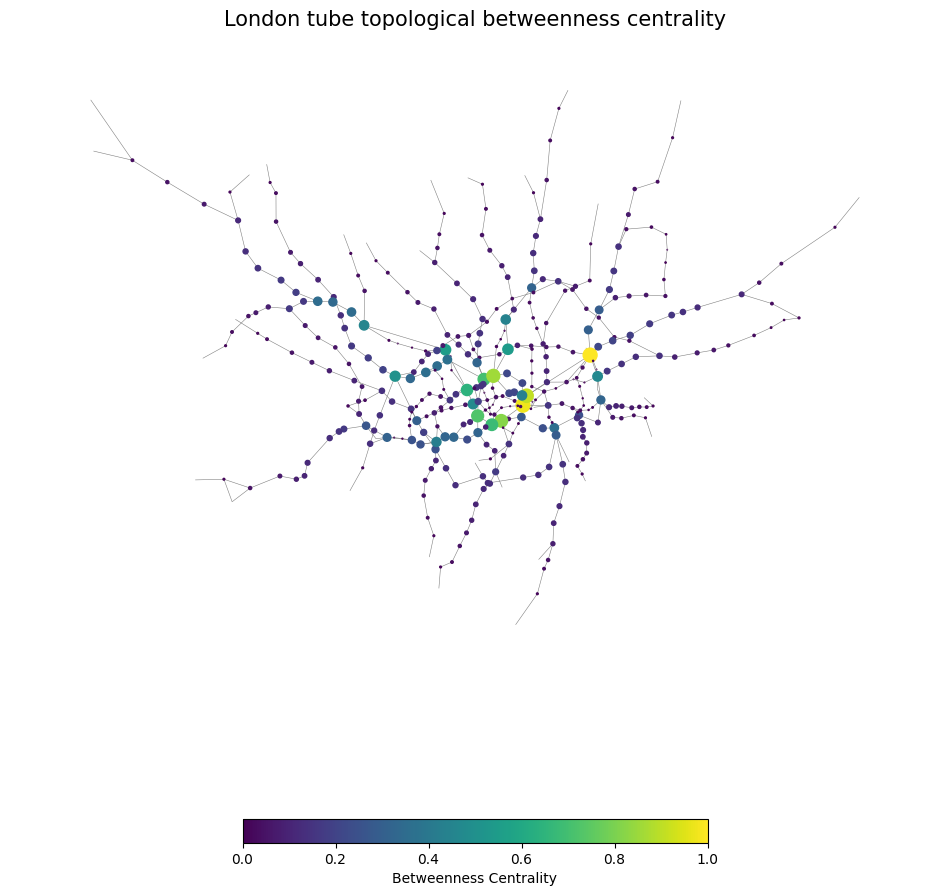

In [17]:
# Lets set colour and size of nodes according to betweenness values
betweenness_t_values=[(i[1]['betweenness_t']) for i in G.nodes(data=True)]

bet_t_color=[(i[1]['betweenness_t']/max(betweenness_t_values)) for i in G.nodes(data=True)]
bet_t_size=[(i[1]['betweenness_t']/max(betweenness_t_values))*100 for i in G.nodes(data=True)]

# Plot graph
fig, ax = plt.subplots(figsize=(12,12))

nx.draw_networkx_edges(G, pos,edge_color='gray', width=0.4)

nod=nx.draw_networkx_nodes(G, pos = pos, node_color= bet_t_color, node_size= bet_t_size)

plt.colorbar(nod,label="Betweenness Centrality",orientation="horizontal", shrink=0.5)
plt.axis("off")
plt.title("London tube topological betweenness centrality",fontsize=15)
plt.show()

### Closeness centrality

In [18]:
#topological closeness centrality
clos_t=nx.closeness_centrality(G)
# We can add these values to the nodes attributes:
nx.set_node_attributes(G,clos_t,'closeness_t')

# To ataframe using the nodes as the index
df = pd.DataFrame()
df['station_name'] = pd.Series(list(G.nodes()))
closeness_dict = pd.Series(nx.get_node_attributes(G, 'closeness_t'))
df['closeness_t'] = df['station_name'].map(closeness_dict)

df_sorted = df.sort_values(["closeness_t"], ascending=False)
top10_closeness_t = df_sorted[0:10]

In [19]:
top10_closeness_t

,station_name,closeness_t
16,Green Park,0.114778
50,Bank and Monument,0.113572
229,King's Cross St. Pancras,0.113443
15,Westminster,0.112549
14,Waterloo,0.112265
45,Oxford Circus,0.111204
17,Bond Street,0.110988
230,Farringdon,0.110742
312,Angel,0.110742
232,Moorgate,0.110314


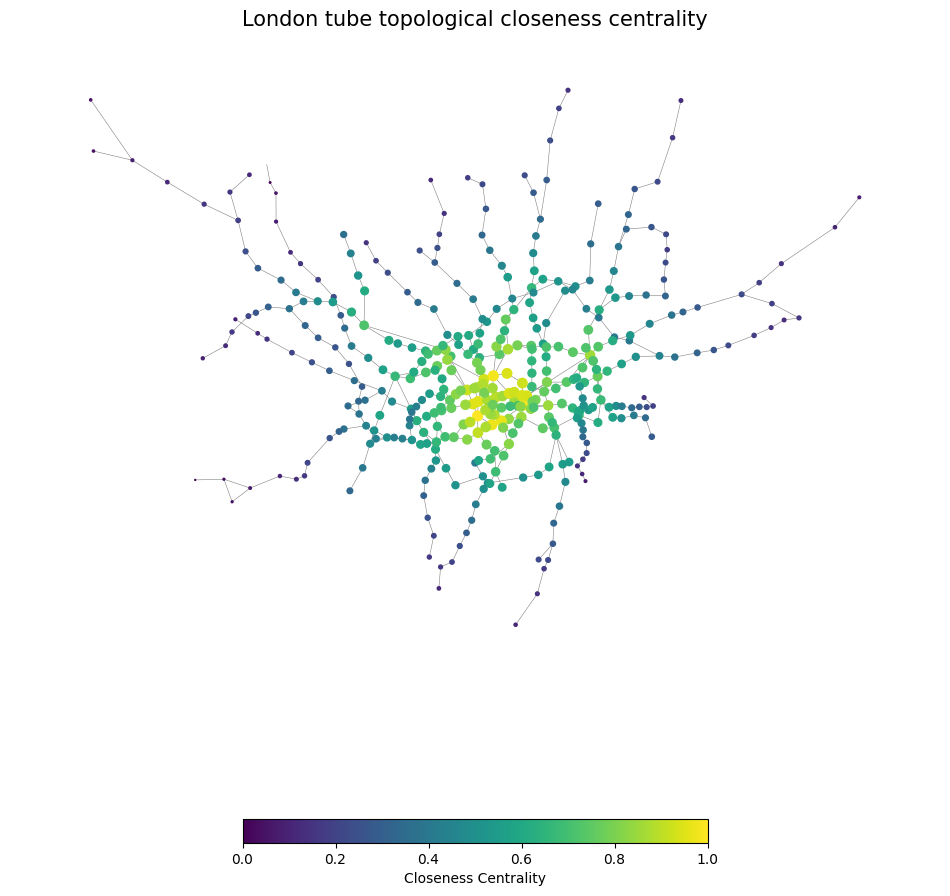

In [20]:
# Lets set color and width of nodes according to the closeness values
clos_t_val=[(i[1]['closeness_t']) for i in G.nodes(data=True)]

closs_t_color=[(i[1]['closeness_t']-min(clos_t_val))/(max(clos_t_val)-min(clos_t_val)) for i in G.nodes(data=True)]
closs_t_size=[((i[1]['closeness_t']-min(clos_t_val))/(max(clos_t_val)-min(clos_t_val))*50) for i in G.nodes(data=True)]


# Plot graph
fig, ax = plt.subplots(figsize=(12,12))

nx.draw_networkx_edges(G, pos,edge_color='gray', 
        width=0.4)

nod=nx.draw_networkx_nodes(G,
        pos = pos,
        node_color= closs_t_color,
        node_size= closs_t_size)

plt.colorbar(nod,label="Closeness Centrality",orientation="horizontal", shrink=0.5)
plt.axis("off")
plt.title("London tube topological closeness centrality",fontsize=15)
plt.show()

#### I.2 Impact measures

#### I.3 Node removal

In [21]:
# remove nodes one at a time according to their rank
# Non-sequential
# degree centrality

G1 = G.copy()
# create lists to store results
results_degree = pd.DataFrame(columns = ['station_name', 'efficiency_d_non', 'connected_d_non'])

sorted_nodes_by_degree = sorted(nx.degree_centrality(G1).items(), key=lambda x: x[1], reverse=True)

# Loop through the sorted nodes
for node, degree_centrality in sorted_nodes_by_degree:
    G1.remove_node(node)  # Remove the current node
    
    # Calculate global efficiency after removing the node
    final_efficiency = nx.global_efficiency(G1)
    
    # Get all connected subgraphs
    connected_subgraphs = list(nx.connected_components(G1))
    
    # Select the largest connected subgraph by number of nodes
    max_connected_subgraph = len(max(connected_subgraphs, key=len))
    
    # Add results to the DataFrame
    results_degree.loc[len(results_degree)] = [node, final_efficiency, max_connected_subgraph]

    # Exit loop if desired number of nodes have been removed
    if len(results_degree) >= 300:
        break

In [22]:
results_degree

,station_name,efficiency_d_non,connected_d_non
0,Stratford,0.088917,379
1,Bank and Monument,0.085862,378
2,Baker Street,0.082033,377
3,King's Cross St. Pancras,0.075700,374
4,West Ham,0.073022,371
...,...,...,...
295,Brent Cross,0.016414,9
296,Golders Green,0.016390,9
297,Hampstead,0.016426,9
298,Belsize Park,0.016557,9


In [23]:
# Sequential
# degree centrality
G1 = G.copy()
results_degree_sequential = pd.DataFrame(columns=['station_name', 'efficiency_d_seq', 'connected_d_seq'])

# 策略B: 连续移除
for i in range(300):
    # 每次循环重新计算度中心性
    degree_centrality = nx.degree_centrality(G1)
    # 找出度中心性最高的节点
    max_node = max(degree_centrality, key=degree_centrality.get)
    
    G1.remove_node(max_node)
    final_efficiency = nx.global_efficiency(G1)
    
    # 获取所有连通子图
    connected_subgraphs = list(nx.connected_components(G1))

    # 选择具有最大节点数的子图作为最大连通子图
    max_connected_subgraph = len(max(connected_subgraphs, key=len))
    
    results_degree_sequential.loc[len(results_degree_sequential)] = [max_node, final_efficiency, max_connected_subgraph]
    


In [24]:
results_degree_sequential

,station_name,efficiency_d_seq,connected_d_seq
0,Stratford,0.088917,379
1,Bank and Monument,0.085862,378
2,Baker Street,0.082033,377
3,King's Cross St. Pancras,0.075700,374
4,Canning Town,0.070396,360
...,...,...,...
295,Cannon Street,0.000000,1
296,Aldgate East,0.000000,1
297,Stepney Green,0.000000,1
298,Bromley-by-Bow,0.000000,1


In [25]:
# remove nodes one at a time according to their rank
# betweenness centrality

G1 = G.copy()
results_betweenness = pd.DataFrame(columns = ['station_name', 'efficiency_b_non', 'connected_b_non'])

# betweenness centrality
sorted_nodes_by_betw = sorted(nx.betweenness_centrality(G1).items(), key=lambda x: x[1], reverse=True)

# Loop through the sorted nodes
for node, degree_centrality in sorted_nodes_by_betw:
    
    G1.remove_node(node)  # Remove the current node
    
    #efficiency
    final_efficiency = nx.global_efficiency(G1)
    
    # 获取所有连通子图
    connected_subgraphs = list(nx.connected_components(G1))

    # 选择具有最大节点数的子图作为最大连通子图
    max_connected_subgraph = len(max(connected_subgraphs, key=len))
  
    results_betweenness.loc[len(results_betweenness)] = [node, final_efficiency, max_connected_subgraph]
    
    # Exit loop if desired number of nodes have been removed
    if len(results_betweenness) >= 300:
        break

In [26]:
results_betweenness

,station_name,efficiency_b_non,connected_b_non
0,Stratford,0.088917,379
1,Bank and Monument,0.085862,378
2,Liverpool Street,0.084963,377
3,King's Cross St. Pancras,0.078498,371
4,Waterloo,0.075942,370
...,...,...,...
295,Haggerston,0.009707,3
296,Upminster,0.009615,3
297,Hoxton,0.009804,3
298,Canons Park,0.009804,3


In [27]:
# Sequential
# degree centrality
G1 = G.copy()
results_betw_sequential = pd.DataFrame(columns=['station_name', 'efficiency_b_seq', 'connected_b_seq'])

# 策略B: 连续移除
for i in range(300):
    # 每次循环重新计算度中心性
    betweenness_centrality = nx.betweenness_centrality(G1)
    # 找出度中心性最高的节点
    max_node = max(betweenness_centrality, key=betweenness_centrality.get)
    
    G1.remove_node(max_node)
    final_efficiency = nx.global_efficiency(G1)
    
    # 获取所有连通子图
    connected_subgraphs = list(nx.connected_components(G1))

    # 选择具有最大节点数的子图作为最大连通子图
    max_connected_subgraph = len(max(connected_subgraphs, key=len))
    
    results_betw_sequential.loc[len(results_betw_sequential)] = [max_node, final_efficiency, max_connected_subgraph]

In [28]:
results_betw_sequential

,station_name,efficiency_b_seq,connected_b_seq
0,Stratford,0.088917,379
1,King's Cross St. Pancras,0.084603,378
2,Waterloo,0.081829,377
3,Bank and Monument,0.077678,376
4,Canada Water,0.072832,375
...,...,...,...
295,Northwood,0.006044,2
296,Pinner,0.005975,2
297,North Harrow,0.006092,2
298,Northwick Park,0.006018,2


In [29]:
# remove nodes one at a time according to their rank
# closeness centrality

G1 = G.copy()
# closeness centrality
results_closeness = pd.DataFrame(columns = ['station_name', 'efficiency_c_non', 'connected_c_non'])
sorted_nodes_by_betw = sorted(nx.closeness_centrality(G1).items(), key=lambda x: x[1], reverse=True)

# Loop through the sorted nodes
for node, degree_centrality in sorted_nodes_by_betw:
    
    G1.remove_node(node)  # Remove the current node
    
    #efficiency
    final_efficiency = nx.global_efficiency(G1)
    
    # 获取所有连通子图
    connected_subgraphs = list(nx.connected_components(G1))

    # 选择具有最大节点数的子图作为最大连通子图
    max_connected_subgraph = len(max(connected_subgraphs, key=len))
  
    results_closeness.loc[len(results_closeness)] = [node, final_efficiency, max_connected_subgraph]
    
    if len(results_closeness) >= 300:
        break

In [30]:
results_closeness

,station_name,efficiency_c_non,connected_c_non
0,Green Park,0.099190,400
1,Bank and Monument,0.094872,399
2,King's Cross St. Pancras,0.087934,398
3,Westminster,0.087372,397
4,Waterloo,0.084859,396
...,...,...,...
295,South Kenton,0.028720,13
296,Finchley Central,0.028462,13
297,Beckton Park,0.028671,13
298,Northwood Hills,0.028618,13


In [31]:
# Sequential
# closeness centrality
G1 = G.copy()
results_clos_sequential = pd.DataFrame(columns = ['station_name', 'efficiency_c_seq', 'connected_c_seq'])
# 策略B: 连续移除
for i in range(300):
    # 每次循环重新计算度中心性
    closeness_centrality = nx.closeness_centrality(G1)
    # 找出度中心性最高的节点
    max_node = max(closeness_centrality, key=closeness_centrality.get)
    
    G1.remove_node(max_node)
    final_efficiency = nx.global_efficiency(G1)
    
    # 获取所有连通子图
    connected_subgraphs = list(nx.connected_components(G1))

    # 选择具有最大节点数的子图作为最大连通子图
    max_connected_subgraph = len(max(connected_subgraphs, key=len))
    
    results_clos_sequential.loc[len(results_clos_sequential)] = [max_node, final_efficiency, max_connected_subgraph]

In [32]:
results_clos_sequential

,station_name,efficiency_c_seq,connected_c_seq
0,Green Park,0.099190,400
1,King's Cross St. Pancras,0.094435,399
2,Waterloo,0.091816,398
3,Bank and Monument,0.085426,397
4,West Hampstead,0.080544,396
...,...,...,...
295,Barons Court,0.000000,1
296,Stamford Brook,0.000000,1
297,Acton Town,0.000000,1
298,Sloane Square,0.000000,1


In [33]:
efficiency_d_non = results_degree['efficiency_d_non']
efficiency_d_seq = results_degree_sequential['efficiency_d_seq']

efficiency_b_non = results_betweenness['efficiency_b_non']
efficiency_b_seq = results_betw_sequential['efficiency_b_seq']

efficiency_c_non = results_closeness['efficiency_c_non']
efficiency_c_seq = results_clos_sequential['efficiency_c_seq']

efficiency_all = pd.concat([efficiency_d_non, efficiency_d_seq, efficiency_b_non, efficiency_b_seq, efficiency_c_non, efficiency_c_seq], axis=1)
efficiency_all

,efficiency_d_non,efficiency_d_seq,efficiency_b_non,efficiency_b_seq,efficiency_c_non,efficiency_c_seq
0,0.088917,0.088917,0.088917,0.088917,0.099190,0.099190
1,0.085862,0.085862,0.085862,0.084603,0.094872,0.094435
2,0.082033,0.082033,0.084963,0.081829,0.087934,0.091816
3,0.075700,0.075700,0.078498,0.077678,0.087372,0.085426
4,0.073022,0.070396,0.075942,0.072832,0.084859,0.080544
...,...,...,...,...,...,...
295,0.016414,0.000000,0.009707,0.006044,0.028720,0.000000
296,0.016390,0.000000,0.009615,0.005975,0.028462,0.000000
297,0.016426,0.000000,0.009804,0.006092,0.028671,0.000000
298,0.016557,0.000000,0.009804,0.006018,0.028618,0.000000


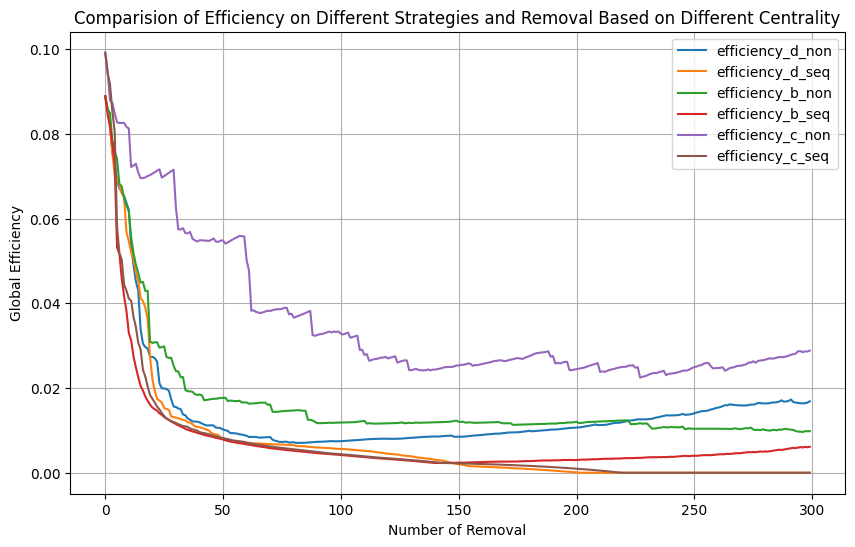

In [34]:
plt.figure(figsize=(10, 6))  # 设置图形大小
for column in efficiency_all.columns:  # 遍历每一列
    plt.plot(efficiency_all.index, efficiency_all[column], label=column)  # 绘制折线，设置标签为列名

plt.xlabel('Number of Removal')  # 设置 x 轴标签
plt.ylabel('Global Efficiency')  # 设置 y 轴标签
plt.title('Comparision of Efficiency on Different Strategies and Removal Based on Different Centrality')  # 设置标题
plt.legend()  # 显示图例
plt.grid(True)  # 添加网格线
plt.show()  # 显示图形

In [35]:
connected_d_non = results_degree['connected_d_non']
connected_d_seq = results_degree_sequential['connected_d_seq']

connected_b_non = results_betweenness['connected_b_non']
connected_b_seq = results_betw_sequential['connected_b_seq']

connected_c_non = results_closeness['connected_c_non']
connected_c_seq = results_clos_sequential['connected_c_seq']

connected_all = pd.concat([connected_d_non, connected_d_seq, connected_b_non, connected_b_seq, connected_c_non, connected_c_seq], axis=1)
connected_all

,connected_d_non,connected_d_seq,connected_b_non,connected_b_seq,connected_c_non,connected_c_seq
0,379,379,379,379,400,400
1,378,378,378,378,399,399
2,377,377,377,377,398,398
3,374,374,371,376,397,397
4,371,360,370,375,396,396
...,...,...,...,...,...,...
295,9,1,3,2,13,1
296,9,1,3,2,13,1
297,9,1,3,2,13,1
298,9,1,3,2,13,1


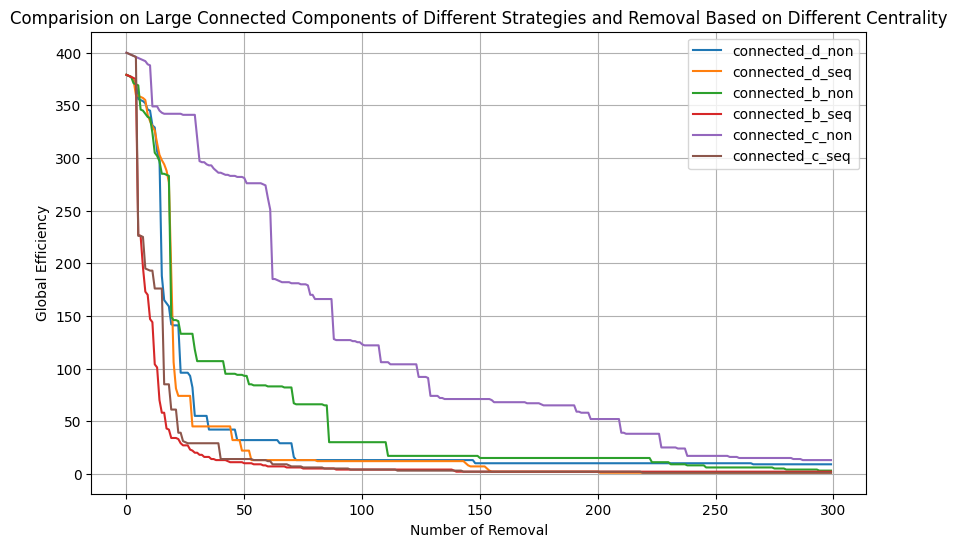

In [36]:
plt.figure(figsize=(10, 6))  # 设置图形大小
for column in connected_all.columns:  # 遍历每一列
    plt.plot(connected_all.index, connected_all[column], label=column)  # 绘制折线，设置标签为列名

plt.xlabel('Number of Removal')  # 设置 x 轴标签
plt.ylabel('Global Efficiency')  # 设置 y 轴标签
plt.title('Comparision on Large Connected Components of Different Strategies and Removal Based on Different Centrality')  # 设置标题
plt.legend()  # 显示图例
plt.grid(True)  # 添加网格线
plt.show()  # 显示图形

### II. Flows: weighted network

In [37]:
flow_data = pd.read_csv("london_flows.csv")

In [66]:
for index, row in flow_data.iterrows():
    from_station = row['station_origin']
    to_station = row['station_destination']
    flow = row['flows']

    # 检查两个站点是否在图中直接连接
    if G.has_edge(from_station, to_station):
        G.edges[from_station, to_station]['weight_d'] = flow

In [67]:
list(G.edges(data = True))

[('Wembley Park',
  'Kingsbury',
  {'length': 2916.7715580506483,
   'line_name': 'Jubilee',
   'flows': 12356,
   'weight_d': 98,
   'weight_b': 0.01020408163265306,
   'weight': 0.01020408163265306}),
 ('Wembley Park',
  'Neasden',
  {'length': 2353.1659381957816,
   'line_name': 'Jubilee',
   'flows': 6744,
   'weight_d': 37,
   'weight_b': 0.02702702702702703,
   'weight': 0.02702702702702703}),
 ('Wembley Park',
  'Preston Road',
  {'length': 1419.7351657633037,
   'line_name': 'Metropolitan',
   'flows': 36601,
   'weight_d': 54,
   'weight_b': 0.018518518518518517,
   'weight': 0.018518518518518517}),
 ('Wembley Park',
  'Finchley Road',
  {'length': 7266.37392749648,
   'line_name': 'Metropolitan',
   'flows': 55216,
   'weight_d': 190,
   'weight_b': 0.005263157894736842,
   'weight': 0.005263157894736842}),
 ('Kingsbury',
  'Queensbury',
  {'length': 1245.9952343630068,
   'line_name': 'Jubilee',
   'flows': 9419,
   'weight_d': 36,
   'weight_b': 0.027777777777777776,
   'we

In [68]:
weighted_degree_centrality = {}
for node in G.nodes():
    # 计算到所有相邻节点的客流总和
    total_flow = sum(data['weight_d'] for _, _, data in G.edges(node, data=True) if 'weight_d' in data)
    # 用客流总和除以 n-1
    weighted_degree_centrality[node] = total_flow / (G.number_of_nodes() - 1)

In [69]:
# top 10 degree centrality
df = pd.DataFrame()
df['station_name'] = pd.Series(list(G.nodes()))
degree_dict = weighted_degree_centrality
df['degree'] = df['station_name'].map(degree_dict) 

df_sorted = df.sort_values(["degree"], ascending=False)
top10_degree_w = df_sorted[0:10]

In [70]:
top10_degree_w

,station_name,degree
50,Bank and Monument,48.2425
14,Waterloo,41.7850
5,Stratford,27.5000
51,Liverpool Street,21.8025
204,Victoria,6.8050
10,Canada Water,5.6450
7,Canning Town,5.4075
9,Canary Wharf,5.3350
16,Green Park,5.2075
8,North Greenwich,4.8075


In [71]:
default_high_weight = 1000  # 调整这个值以适应具体情况
for u, v, data in G.edges(data=True):
    if 'weight_d' in data:  # 先检查 'weight' 是否存在
        flow = data['weight_d']
        if flow > 0:
            weight_b = 1 / flow
        else:
            weight_b = default_high_weight  # 客流为0时赋予非常大的权重
        G[u][v]['weight_b'] = weight_b



In [72]:
weighted_betweenness_centrality = nx.betweenness_centrality(G, weight='weight_b', normalized=True)

In [45]:
df = pd.DataFrame()
df['station_name'] = pd.Series(list(G.nodes()))
degree_dict = weighted_betweenness_centrality
df['degree'] = df['station_name'].map(degree_dict) 

df_sorted = df.sort_values(["degree"], ascending=False)
top10_betweenness_w = df_sorted[0:10]

In [46]:
top10_betweenness_w

,station_name,degree
50,Bank and Monument,0.524825
5,Stratford,0.448509
51,Liverpool Street,0.398070
6,West Ham,0.351742
229,King's Cross St. Pancras,0.345840
16,Green Park,0.308897
14,Waterloo,0.297531
7,Canning Town,0.277268
15,Westminster,0.273170
232,Moorgate,0.271867


In [47]:
weighted_closeness_centrality = nx.closeness_centrality(G, distance='weight_b')

df = pd.DataFrame()
df['station_name'] = pd.Series(list(G.nodes()))
degree_dict = weighted_closeness_centrality
df['degree'] = df['station_name'].map(degree_dict) 

df_sorted = df.sort_values(["degree"], ascending=False)
top10_closeness_w = df_sorted[0:10]

In [61]:
top10_closeness_w

,station_name,degree
50,Bank and Monument,0.014205
14,Waterloo,0.014205
51,Liverpool Street,0.014205
5,Stratford,0.014205
6,West Ham,0.014204
132,Shadwell,0.014204
232,Moorgate,0.014204
296,Stratford International,0.014204
12,London Bridge,0.014204
206,Embankment,0.014204


III.3 Remove Nodes

In [73]:
for u, v, data in G.edges(data=True):
    
    data['weight'] = data['weight_b']
    

KeyError: 'weight_b'

In [75]:
missing_weights = [(u, v) for u, v, data in G.edges(data=True) if 'weight_d' not in data]
if missing_weights:
    print("还有缺失weight_d的边:", missing_weights)
else:
    print("所有边都已经包含weight_d键")

还有缺失weight_d的边: [('Kennington', 'Nine Elms'), ('Battersea Power Station', 'Nine Elms')]


True